### Loading Required Packages

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# pre-processing
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

### Loading and Exploring the Dataset

In [2]:
# loading the dataset in Pandas DataFrame
df = pd.read_csv('Restaurants.csv')
# first 5 rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# analyzing the number of rows and columns
df.shape

(9551, 21)

In [4]:
# data type and non-null count information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# data types of columns present
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
# checking for null/nan values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# data description/statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [8]:
# categorical columns in the dataset 
cat_col = df.select_dtypes(include=['object']).columns.tolist()
cat_col

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [9]:
# numerical columns in the dataset 
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_col

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

### Handling Null/NaN Values

In [10]:
def cuisine_impute(locality):
    """
    imputing missing 'Cuisines' values based on the most common cuisines in the given locality
    """
    list1 = (', '.join(df[df['Locality'] == locality]['Cuisines'].dropna())).split(',')
    list2 = [x.strip() for x in list1] 
    top_cuisines = [x[0] for x in Counter(list2).most_common(3)]  
    return ', '.join(top_cuisines)  


def cuisine_impute2(city):
    """
    imputing missing 'Cuisines' values based on the most common cuisines in the given city
    """
    list1 = (', '.join(df[df['City'] == city]['Cuisines'].dropna())).split(',')
    list2 = [x.strip() for x in list1]  
    top_cuisines = [x[0] for x in Counter(list2).most_common(3)]  
    return ', '.join(top_cuisines)  

In [11]:
# dropping and imputing missing values
df = df.drop(df[df['City'] == 'Miller'].index).reset_index(drop=True)  
df.loc[df['Locality']=='Kaimuki', 'Cuisines'] = df.loc[df['Cuisines'].isnull(), 'City'].apply(cuisine_impute2)
df.loc[df['Cuisines'].isnull(), 'Cuisines'] = df.loc[df['Cuisines'].isnull(), 'Locality'].apply(cuisine_impute)

In [12]:
# checking for null values after imputation
print(df['Cuisines'].isnull().sum()) 

0


### Data Visualizing

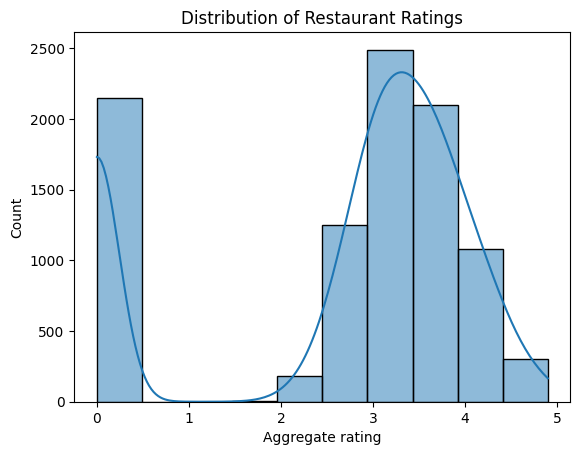

In [13]:
# distribution of 'Aggregate rating'
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.show()

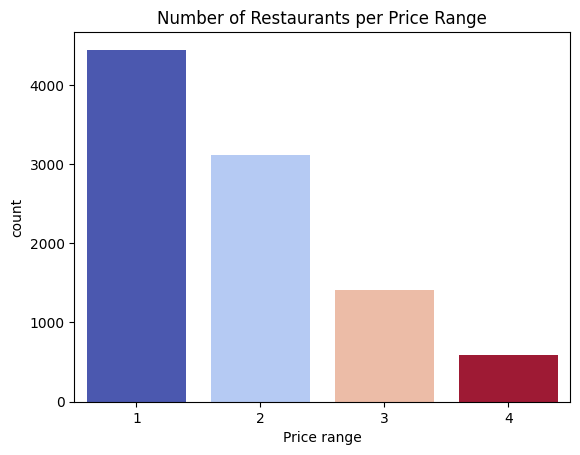

In [14]:
# count of restaurant per price range
sns.countplot(x='Price range', data=df, hue='Price range', palette='coolwarm', legend=False)
plt.title("Number of Restaurants per Price Range")
plt.show()

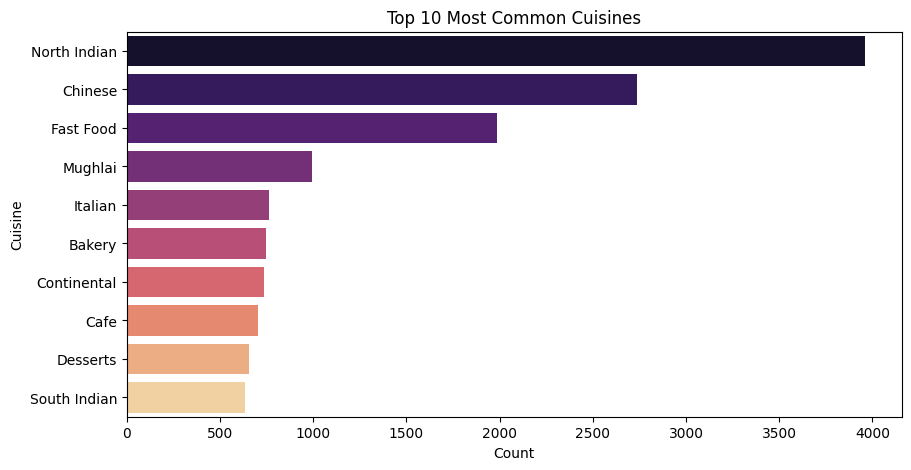

In [15]:
# most popular cuisines
cuisines = ', '.join(list(df['Cuisines'])).split(',')
cuisines = [x.strip() for x in cuisines]
df_cuisine = pd.DataFrame(Counter(cuisines).most_common(10), columns=['Cuisine', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Cuisine', data=df_cuisine, hue='Cuisine', palette='magma', legend=False)

plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

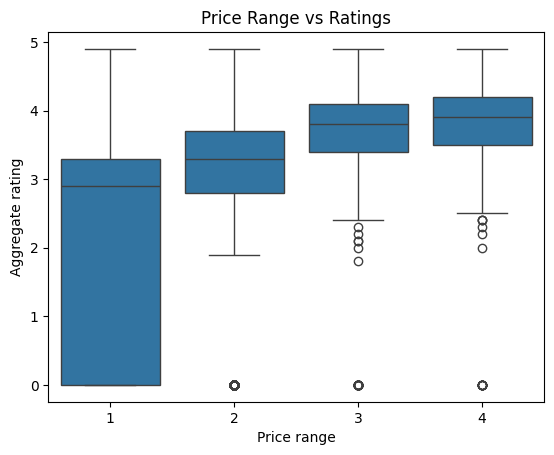

In [16]:
# price range v/s aggregate rating
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title("Price Range vs Ratings")
plt.show()

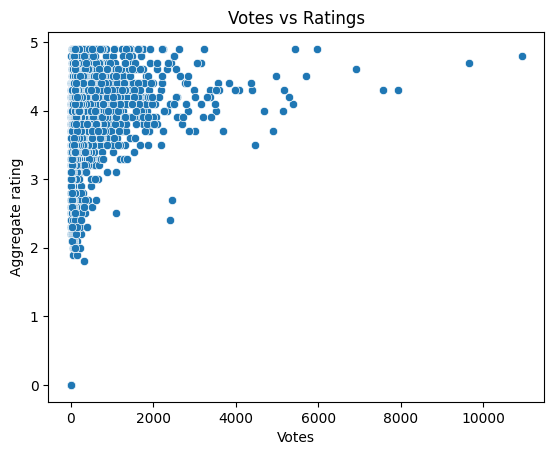

In [17]:
# votes v/s ratings
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title("Votes vs Ratings")
plt.show()

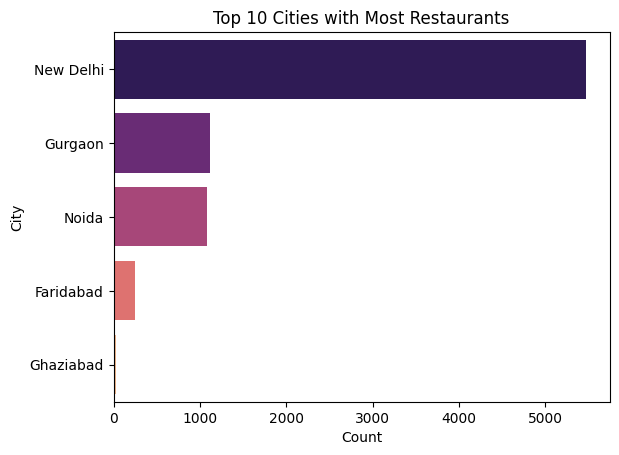

In [18]:
# top cities by restaurant count
top_cities = df['City'].value_counts().head(5)
df_top_cities = top_cities.reset_index()
df_top_cities.columns = ['City', 'Count']

sns.barplot(x='Count', y='City', data=df_top_cities, hue='City', palette='magma', legend=False)
plt.title("Top 10 Cities with Most Restaurants")
plt.show()

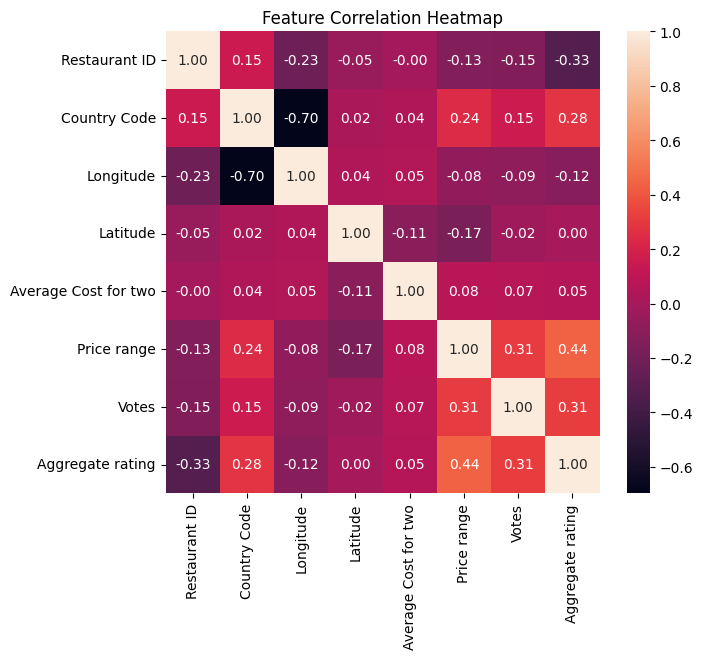

In [19]:
# correlation analysis
plt.figure(figsize=(7,6))
df_num = df[['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes', 'Aggregate rating']]
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

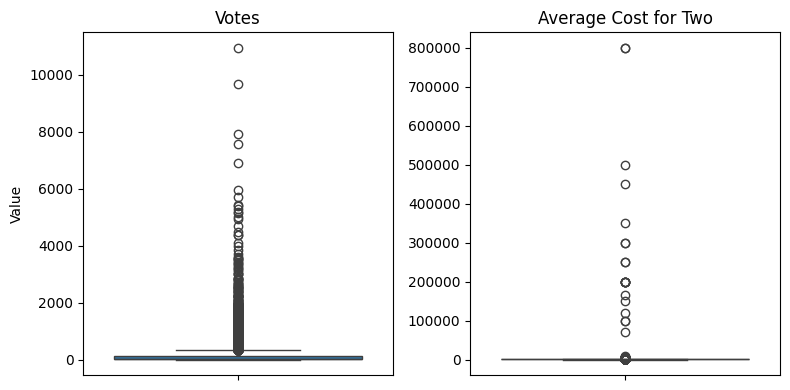

In [20]:
# outliers in number of votes and average cost for two
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  

sns.boxplot(y=df['Votes'], ax=axes[0])
axes[0].set_title("Votes")
axes[0].set_xlabel("")
axes[0].set_ylabel("Value")

sns.boxplot(y=df['Average Cost for two'], ax=axes[1])
axes[1].set_title("Average Cost for Two")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

### Data Pre-processing

#### 1. Converting all Currencies into INR

In [21]:
# different currencies in the dataset
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [22]:
# Conversion rates dictionary into INR
conversion_rates = {
    'Indonesian Rupiah(IDR)': 0.005314,
    'Botswana Pula(P)': 6.39,
    'Brazilian Real(R$)': 14.97,
    'Dollar($)': 87.18,
    'Emirati Diram(AED)': 23.74,
    'Indian Rupees(Rs.)': 1.00, 
    'NewZealand($)': 50.21,
    'Pounds(��)': 112.71,  
    'Qatari Rial(QR)': 23.93,
    'Rand(R)': 4.78,
    'Sri Lankan Rupee(LKR)': 0.30,
    'Turkish Lira(TL)': 2.38
}

def convert_to_inr(row):
    """ 
    converting "Average Cost for two" to INR
    """
    currency = row['Currency']
    cost = row['Average Cost for two']
    return cost * conversion_rates.get(currency, 1)  

df['Average Cost for two (INR)'] = df.apply(convert_to_inr, axis=1)
print(df[['Currency', 'Average Cost for two', 'Average Cost for two (INR)']].head())

           Currency  Average Cost for two  Average Cost for two (INR)
0  Botswana Pula(P)                  1100                      7029.0
1  Botswana Pula(P)                  1200                      7668.0
2  Botswana Pula(P)                  4000                     25560.0
3  Botswana Pula(P)                  1500                      9585.0
4  Botswana Pula(P)                  1500                      9585.0


#### 2. Dependent and Independent Variables

In [23]:
# dividing the dataset into X (features) and y (target variable)
X = df[['Locality', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Votes', 'Average Cost for two (INR)']]
y = df['Aggregate rating']

In [24]:
# shape
print('X Shape: ', X.shape)
print('y Shape:', y.shape)

X Shape:  (9550, 7)
y Shape: (9550,)


#### 3. Encoding Categorical Variables

In [25]:
# label encoding 'Locality'
le = LabelEncoder()
X['Locality_encoded'] = le.fit_transform(X['Locality'])

# dropping original column
X.drop(columns=['Locality'], inplace=True)
X[['Locality_encoded']].head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16436\337088258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Locality_encoded'] = le.fit_transform(X['Locality'])
C:\Users\USER\AppData\Local\Temp\ipykernel_16436\337088258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Locality'], inplace=True)


,Locality_encoded
0,171
1,593
2,308
3,861
4,861


In [26]:
# multi-label binarization of 'Cuisines'
mlb = MultiLabelBinarizer()

# splitting cuisines into lists
X['Cuisines'] = X['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',')])
cuisine_encoded = pd.DataFrame(mlb.fit_transform(X['Cuisines']), columns=mlb.classes_)

# merging with the original dataset
X = X.join(cuisine_encoded).drop(columns=['Cuisines'])
X.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16436\919733680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cuisines'] = X['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',')])


,Has Table booking,Has Online delivery,Is delivering now,Votes,Average Cost for two (INR),Locality_encoded,Afghani,African,American,Andhra,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,Yes,No,No,314,7029.0,171,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,No,591,7668.0,593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,No,270,25560.0,308,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,No,365,9585.0,861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Yes,No,No,229,9585.0,861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# binary-encoding
X['Has Table booking'] = X['Has Table booking'].map({'Yes': 1, 'No': 0})
X['Has Online delivery'] = X['Has Online delivery'].map({'Yes': 1, 'No': 0})
X['Is delivering now'] = X['Is delivering now'].map({'Yes': 1, 'No': 0})
X.head()

,Has Table booking,Has Online delivery,Is delivering now,Votes,Average Cost for two (INR),Locality_encoded,Afghani,African,American,Andhra,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,1,0,0,314,7029.0,171,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,591,7668.0,593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,270,25560.0,308,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,365,9585.0,861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,229,9585.0,861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4. Log Transformation of 'Votes' and 'Average Cost for two (INR)'

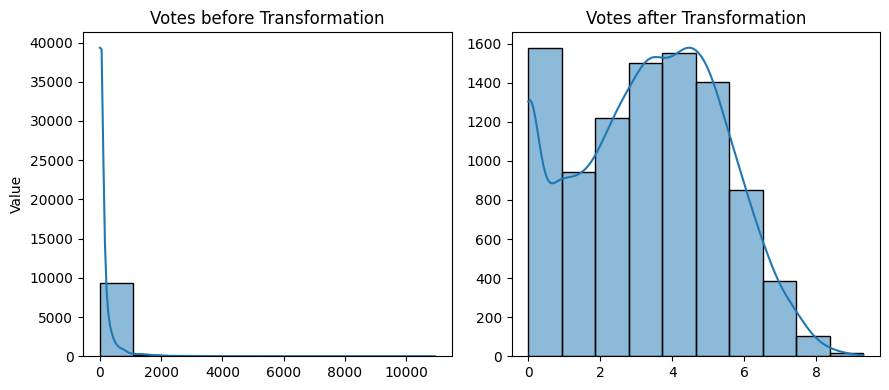

In [28]:
# distribution before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

sns.histplot(x=X['Votes'], ax=axes[0], bins=10, kde=True)
axes[0].set_title("Votes before Transformation")
axes[0].set_xlabel("")
axes[0].set_ylabel("Value")

X['Votes'] = np.log1p(X['Votes'])
sns.histplot(x=X['Votes'], ax=axes[1], bins=10, kde=True)
axes[1].set_title("Votes after Transformation")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

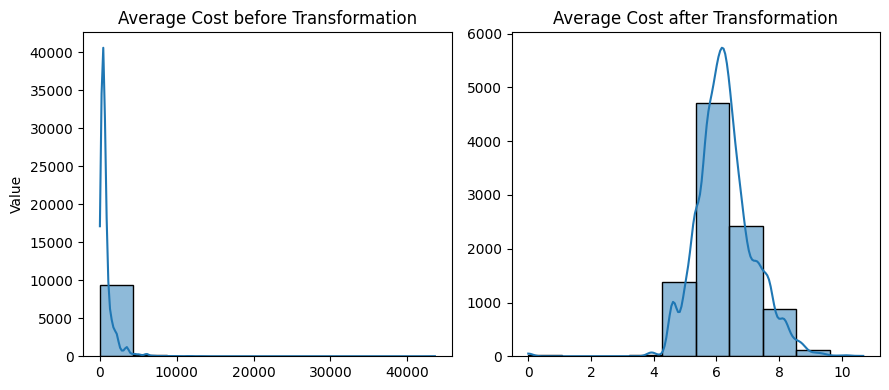

In [29]:
# distribution before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

sns.histplot(x=X['Average Cost for two (INR)'], ax=axes[0], bins=10, kde=True)
axes[0].set_title("Average Cost before Transformation")
axes[0].set_xlabel("")
axes[0].set_ylabel("Value")

X['Average Cost for two (INR)'] = np.log1p(X['Average Cost for two (INR)'])
sns.histplot(x=X['Average Cost for two (INR)'], ax=axes[1], bins=10, kde=True)
axes[1].set_title("Average Cost after Transformation")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

### Predicting the Restaurant Ratings

#### 1. Splitting data into Training and Testing

In [30]:
# splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# scaling the 'Votes' and 'Average Cost for two' columns 
scaler = StandardScaler()

X_train[['Votes','Average Cost for two (INR)']] = scaler.fit_transform(X_train[['Votes', 'Average Cost for two (INR)']])
X_test[['Votes','Average Cost for two (INR)']] = scaler.transform(X_test[['Votes', 'Average Cost for two (INR)']])

In [32]:
# shape
print('X train Shape: ', X_train.shape)
print('y train Shape:', y_train.shape)

print('X test Shape: ', X_test.shape)
print('y test Shape:', y_test.shape)

X train Shape:  (7640, 151)
y train Shape: (7640,)
X test Shape:  (1910, 151)
y test Shape: (1910,)


#### 2. Linear Regression Model

In [33]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
# prediction
lin_y_pred = lin_reg.predict(X_test)

# metrics
lin_reg_r2 = r2_score(y_test,lin_y_pred)
lin_reg_mse = mean_squared_error(y_test,lin_y_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)

print(f'Linear Regression:\n\n1. R2 Score: {lin_reg_r2:.4f}\n2. MSE: {lin_reg_mse:.4f}\n3. RMSE: {lin_reg_rmse:.4f}')

Linear Regression:

1. R2 Score: 0.7325
2. MSE: 0.6216
3. RMSE: 0.7884


#### 3. Decision Tree Regressor

In [35]:
# decision tree
dtree=DecisionTreeRegressor(min_samples_leaf=5)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [36]:
# prediction
dtree_y_pred = dtree.predict(X_test)

# metrics
dtree_r2 = r2_score(y_test,dtree_y_pred)
dtree_mse = mean_squared_error(y_test,dtree_y_pred)
dtree_rmse = np.sqrt(dtree_mse)

print(f'Decision Tree Regressor:\n\n1. R2 Score: {dtree_r2:.4f}\n2. MSE: {dtree_mse:.4f}\n3. RMSE: {dtree_rmse:.4f}')

Decision Tree Regressor:

1. R2 Score: 0.9420
2. MSE: 0.1347
3. RMSE: 0.3671


#### 4. Random Forest Regressor

In [37]:
# random forest regressor
rf = RandomForestRegressor(n_estimators=100,random_state=42,min_samples_leaf=20)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, random_state=42)

In [38]:
# prediction
rf_y_pred = rf.predict(X_test)

# metrics
rf_r2 = r2_score(y_test,rf_y_pred)
rf_mse = mean_squared_error(y_test,rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f'Random Forest Regressor:\n\n1. R2 Score: {rf_r2:.4f}\n2. MSE: {rf_mse:.4f}\n3. RMSE: {rf_rmse:.4f}')

Random Forest Regressor:

1. R2 Score: 0.9561
2. MSE: 0.1020
3. RMSE: 0.3194


#### 5. XGBoost Regressor

In [39]:
# xgboost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
# prediction
xgb_y_pred = xgb_reg.predict(X_test)

# metrics
xgb_r2 = r2_score(y_test,xgb_y_pred)
xgb_mse = mean_squared_error(y_test,xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f'XGBoost Regressor:\n\n1. R2 Score: {xgb_r2:.4f}\n2. MSE: {xgb_mse:.4f}\n3. RMSE: {xgb_rmse:.4f}')

XGBoost Regressor:

1. R2 Score: 0.9588
2. MSE: 0.0958
3. RMSE: 0.3096
